In [3]:
import torch
from torch import nn

from polyhedra import cx

import matplotlib.pyplot as plt

## Obtaining C(F) and plotting

In [6]:
#select architecture
architecture = [2,10,5,1]

#randomly initialize neural network with this architecture
model = cx.DeepNeuralNetwork(architecture) 

#obtain polyhedral complex associated with this model
plot_dictionary, vertices, ss_vertices = cx.get_full_complex(model, max_depth=3)


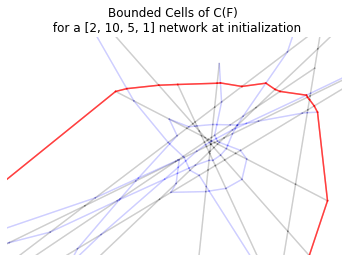

In [7]:
colors = ['black']*architecture[1]+['blue']*architecture[2] + ['red']
bound = 4.5

fig,ax = plt.subplots()
ax.set_xlim(-bound, bound)
ax.set_ylim(-bound, bound)
ax.set_axis_off()

pd = cx.numpyize_plot_dict(plot_dictionary)

cx.plot_complex(pd, 
                sum(architecture[1:]), 
                dim = 2,
                colors = colors, 
                ax = ax)

ax.set_title("Bounded Cells of C(F) \n for a {} network at initialization".format(architecture))
    
plt.show()

## Theorem 15 Example
There exists a pair of networks $F_1$ and $F_2$ such that the set of strings encoding the activation patterns in the interiors of the cells of $\mathcal{C}(F_1)$ and $\mathcal{C}(F_2)$ are equal, but the polyhedral complexes $\mathcal{C}(F_1)$ and $\mathcal{C}(F_2)$ are not combinatorially equivalent.


In [8]:
model1_weights = torch.load("models/model1.pt") 
model2_weights = torch.load("models/model2.pt")

model1 = cx.NeuralNetwork((2,4,1)) 
model2 = cx.NeuralNetwork((2,4,1)) 

model1.load_state_dict(model1_weights)
model2.load_state_dict(model2_weights)

plotdict1, points1, vertex_ss1 = cx.get_full_complex(model1, max_depth=2)
plotdict2, points2, vertex_ss2 = cx.get_full_complex(model2, max_depth=2)

Text(0.5, 1.0, 'Model 2 bounded cells visualized')

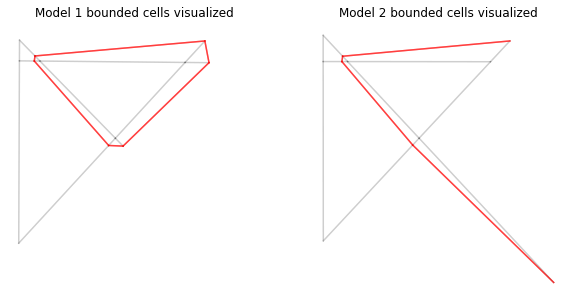

In [9]:
fig,ax=plt.subplots(1,2, sharex=True, sharey=True, figsize=(10,5))
ax[0].set_axis_off() 
ax[1].set_axis_off() 

cx.plot_complex(cx.numpyize_plot_dict(plotdict1),
                5,
                colors=['black']*4+
                ['red'],
                ax=ax[0],
                dim=2
               )

cx.plot_complex(cx.numpyize_plot_dict(plotdict2),
                5,
                colors=['black']*4+
                ['red'],
                ax=ax[1],
                dim=2
               )

ax[0].set_title("Model 1 bounded cells visualized") 
ax[1].set_title("Model 2 bounded cells visualized") 

In [10]:
# The vertices which are present are not the same
# (so their face posets are not combinatorially equivalent)

print("Model 1 has {} vertices whereas Model 2 has {} vertices".format(len(points1),len(points2)))

Model 1 has 18 vertices whereas Model 2 has 16 vertices


In [11]:
# However, the sign sequences of the top-dimensional cells in model1 and model2 are the same. 

signs=torch.Tensor(cx.get_signs(2))

all_regions1 = cx.get_ssr(vertex_ss1,5,signs)
all_regions2 = cx.get_ssr(vertex_ss2,5,signs)

print((all_regions1 == all_regions2).detach().numpy())

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
